.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

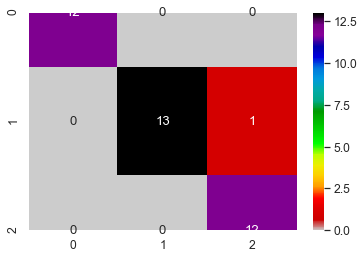

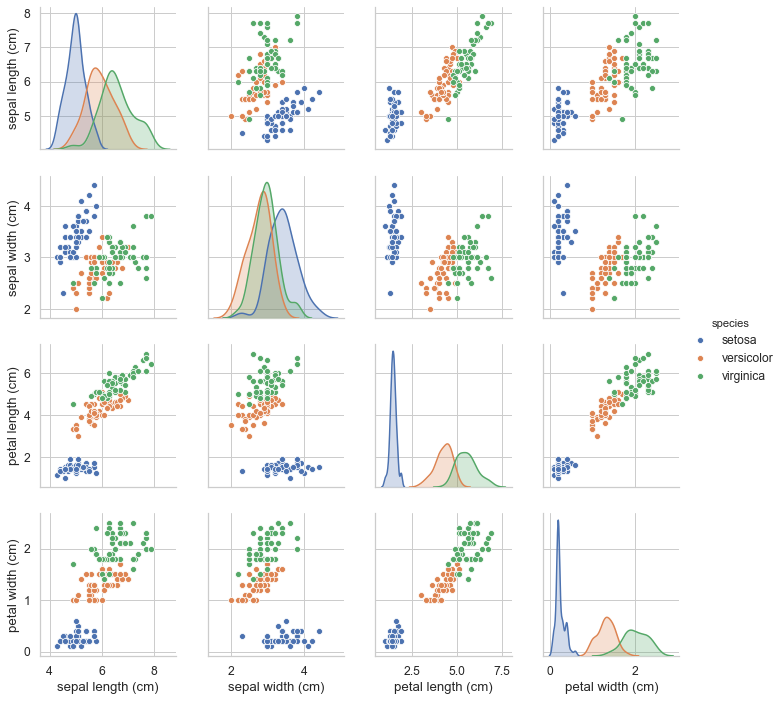

In [40]:
from sklearn.datasets import load_iris
iris=load_iris()
print(iris.DESCR)
import pandas as pd
pd.set_option('max_columns',5)
pd.set_option('display.width',None)
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['species']=[iris.target_names[i] for i in iris.target]
#import seaborn as sns
#sns.set(font_scale=1.1)
#sns.set_style('whitegrid')
#grid=sns.pairplot(data=iris_df,vars=iris_df.columns[0:4],hue='species')
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris.data, iris.target,random_state=15)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X=X_train,y=y_train)
predicted=knn.predict(X=X_test)
expected=y_test
wrong=[(p,e)for (p,e) in zip(predicted,expected) if p!=e]
print('\nIncorrect predictions:',wrong)
print(f'\nPrediction accuracy:{knn.score(X_test,y_test):.2%}')
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_true=expected,y_pred=predicted)
print(confusion)
from sklearn.metrics import classification_report
names=[str(i) for i in iris.target_names]
print(classification_report(expected,predicted,target_names=names))
confusion_df=pd.DataFrame(confusion,index=range(3),columns=range(3))
axes=sns.heatmap(confusion_df,annot=True,cmap='nipy_spectral_r')
import seaborn as sns
sns.set(font_scale=1.1)
sns.set_style('whitegrid')
grid=sns.pairplot(data=iris_df,vars=iris_df.columns[0:4],hue='species')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
for k in range(1,20,2):
    kfold=KFold(n_splits=10,random_state=15,shuffle=True)
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(estimator=knn,X=iris.data, y=iris.target, cv=kfold)
    print(f'k={k:<2};mean accuracy={scores.mean():.2%};'+
         f'standard deviation={scores.std():.2%}')
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
estimators={
    'KNeighborsClassifier':knn,
    'SVC':SVC(gamma='scale'),
    'GaussianNB': GaussianNB()}
for estimator_name, estimator_object in estimators.items():
    kfold=KFold(n_splits=10,random_state=15,shuffle=True)
    scores=cross_val_score(estimator=estimator_object,
    X=iris.data,y=iris.target, cv=kfold)
    print(f'{estimator_name:>20}: '+
         f'mean accuracy={scores.mean():.2%}; ' +
         f'standard deviation={scores.std():.2%}')